In [2]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop(['CustomerID'],axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16812\2128423629.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


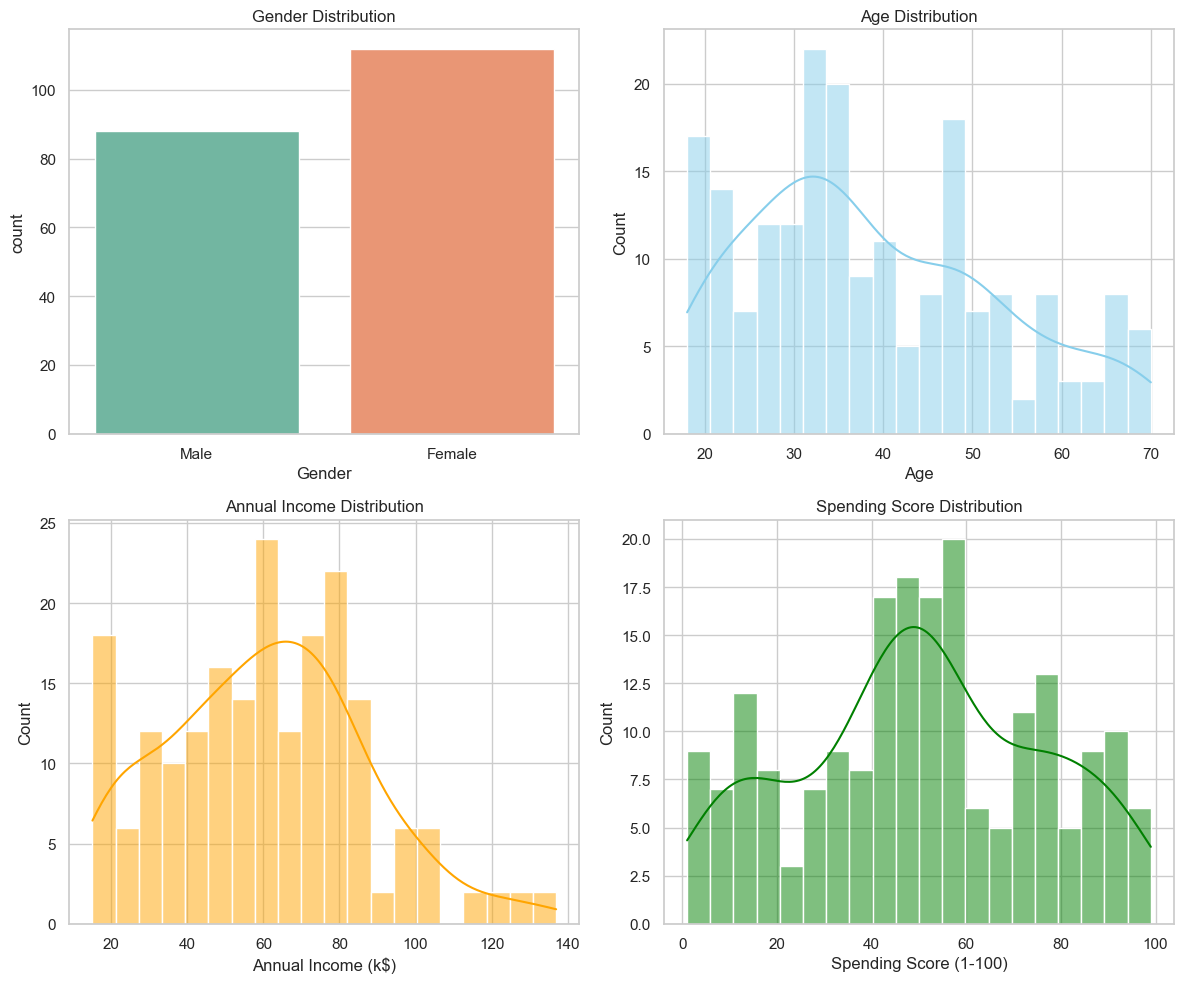

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataset
# df = pd.read_csv("your_dataset.csv")

# Set the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Gender
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')

# Age
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Age', kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')

# Annual Income
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Annual Income (k$)', kde=True, bins=20, color='orange')
plt.title('Annual Income Distribution')

# Spending Score
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, bins=20, color='green')
plt.title('Spending Score Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


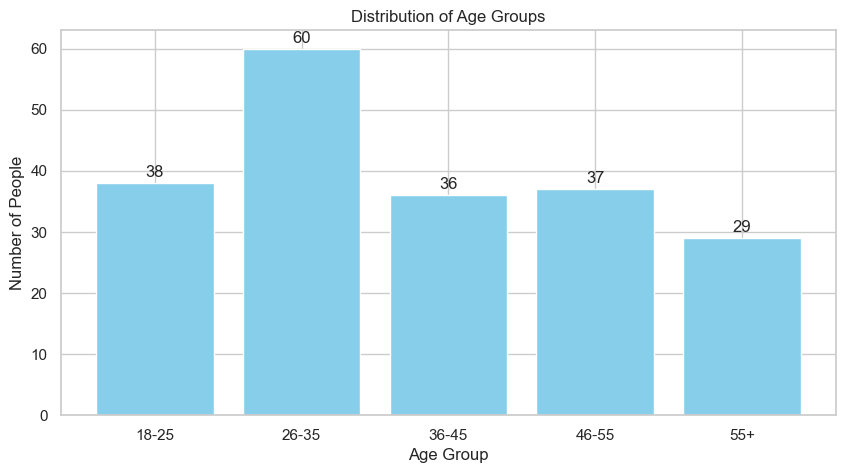

In [11]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = (len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values))

plt.figure(figsize=(10,5))
plt.bar(agex, agey, color='skyblue')  # Create the bar plot

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.title("Distribution of Age Groups")

# Add value labels on top of the bars (optional but often helpful)
for i, value in enumerate(agey):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')  # Adjust vertical position (0.5) as needed

plt.show()

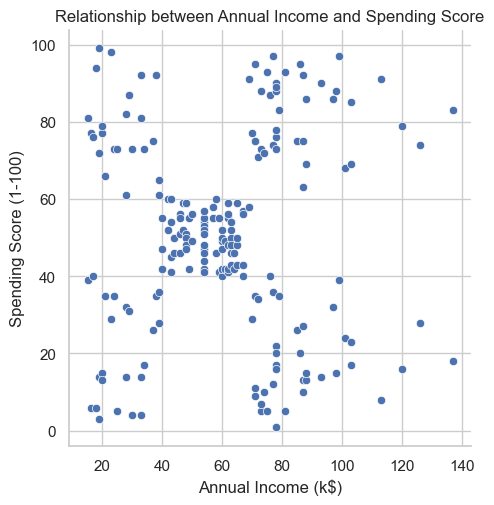

In [16]:
annual_income_column = 'Annual Income (k$)'
spending_score_column = 'Spending Score (1-100)'
sns.relplot(x=annual_income_column, y=spending_score_column, data=df)

    # Add title and labels for clarity
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

    # Show the plot
plt.show()

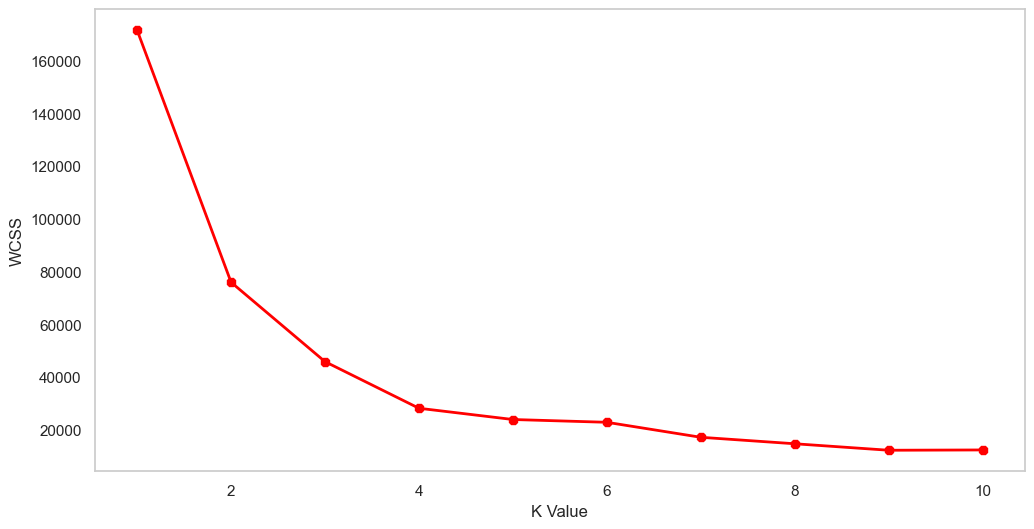

In [19]:
x1=df.loc[:,["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [22]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


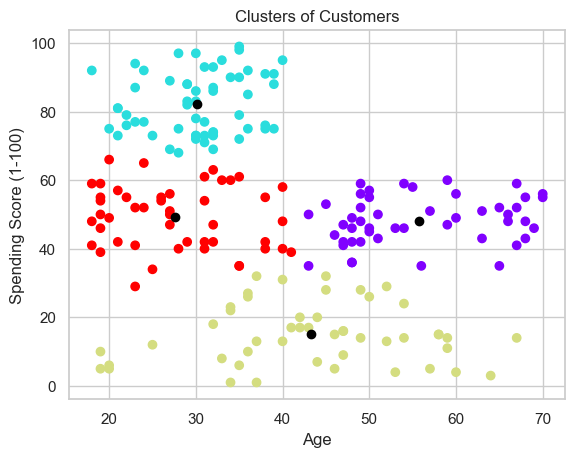

In [25]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

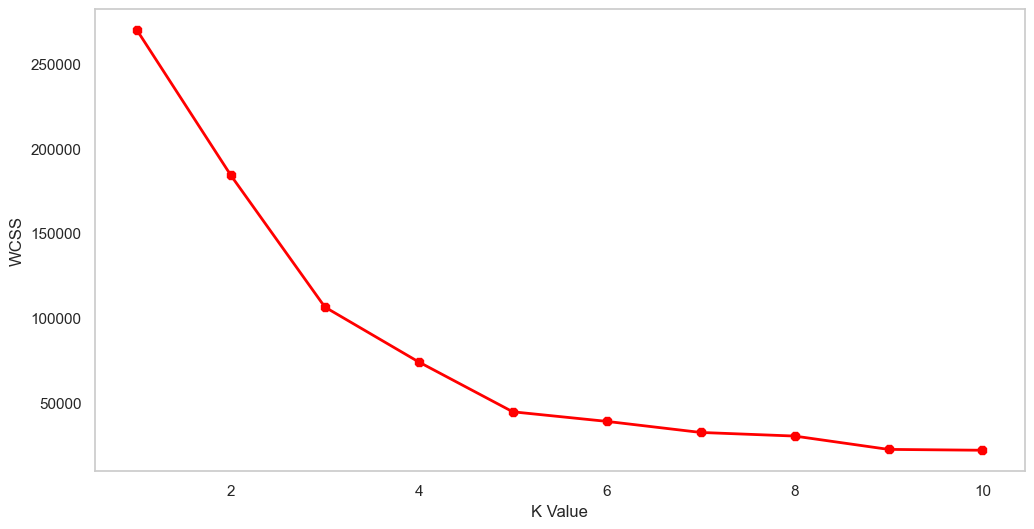

In [26]:
x2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [27]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)

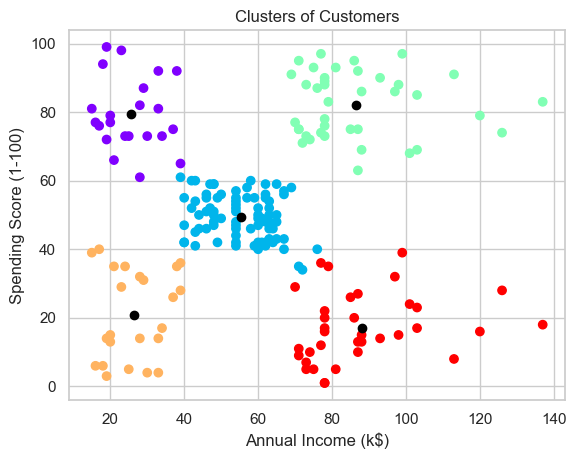

In [28]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

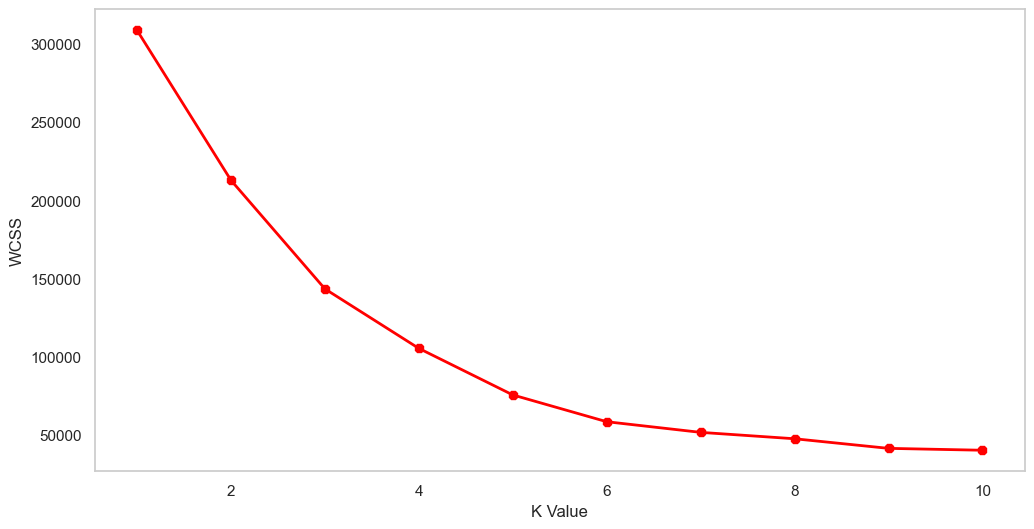

In [29]:
x3=df.iloc[:,1:]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [30]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x3)

In [34]:
import plotly.graph_objects as go

# Assuming 'clusters' and 'df["label"]' are already defined
colors = ['blue', 'red', 'green', 'orange', 'purple']

fig = go.Figure()

for label in range(5):
    fig.add_trace(go.Scatter3d(
        x=df.Age[df.label == label],
        y=df["Annual Income (k$)"][df.label == label],
        z=df["Spending Score (1-100)"][df.label == label],
        mode='markers',
        marker=dict(size=6, color=colors[label]),
        name=f'Cluster {label}'
    ))

# Customize layout similar to your view_init(30, 185)
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score (1-100)',
        camera=dict(eye=dict(x=-1.5, y=1.5, z=0.8))  # Approximate view angle
    ),
    width=900,
    height=600,
    title='Customer Segmentation (3D Clustering)'
)

fig.show()
